## logging in the huggingface to access models

In [78]:
from huggingface_hub import notebook_login

notebook_login()

## Loading the Tokenizers

In [71]:
# Load model directly
from transformers import AutoTokenizer
from transformers import BartTokenizer
from transformers import LEDTokenizer

tokenizerMIV3 = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.3")
tokenizerMC = AutoTokenizer.from_pretrained("mistralai/Codestral-22B-v0.1")
tokenizerMIV2 = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
tokenizerB = BartTokenizer.from_pretrained('sshleifer/distilbart-cnn-12-6')
tokenizerALED = LEDTokenizer.from_pretrained('allenai/led-base-16384')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## loading the dataset

In [59]:
import pandas as pd
df=pd.read_csv("dataset.csv")
df

,HeadNote,Judgment,HNTMIV3,HNTMIV2,HNTMC,HNTB,HNTALED,JMTMIV3,JMTMIV2,JMTMC,JMTB,JMTALED
0,A dispute having arisen between the appellant-...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,827,827,827,774,774,4492,4492,4492,4252,4252
1,"By s. 312 of the Companies Act, 1956, ""Any ass...",CIVIL APPELLATE JURISDICTION: Civil Appeal No....,520,520,520,484,484,7011,7011,7011,6736,6736
2,"The appellant was an employee of one T, a ven...",CRIMINAL APPELLATE JURISDICTION :Criminal Appe...,442,442,442,385,385,2766,2766,2766,2584,2584
3,During the course of conciliation proceedings ...,CIVIL APPELLATE JURISDICTION: Civil Appeals N...,1110,1110,1110,1011,1011,9147,9147,9147,8776,8776
4,It is not correct to say that S. 79 of the F...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,637,637,637,591,591,5972,5972,5972,6016,6016
...,...,...,...,...,...,...,...,...,...,...,...,...
993,The liability to pay rent under a lease does ...,CIVIL APPELLATE. JURISDICTION : Civil A...,364,364,364,312,312,3246,3246,3246,3025,3025
994,Since1940 taxis plying in the streets of Calcu...,CIVIL APPELLATE JURISDICTION Civil Appeal ...,540,540,540,488,488,3750,3750,3750,3462,3462
995,"A dispute arising, subsequent to a contract fo...",CIVIL APPELLATE JURISDICTION Civil ...,546,546,546,505,505,6721,6721,6721,6267,6267
996,Where a Hindu widow surrenders her widow’s e...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,763,763,763,727,727,13098,13098,13098,12789,12789


## finding the tokens for Head Notes

In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
df=df.dropna()
li=list(df['HeadNote'])
for i in range(998,len(li)):
  print(i)
  l11=tokenizerMIV3.tokenize(li[i])
  l12=tokenizerMC.tokenize(li[i])
  l13=tokenizerB.tokenize(li[i])
  l14=tokenizerMIV2.tokenize(li[i])
  l15=tokenizerALED.tokenize(li[i])
  l1.append(len(l11))
  l2.append(len(l12))
  l3.append(len(l13))
  l4.append(len(l14))
  l5.append(len(l15))

df["HNTMIV3"]=l1
df["HNTMIV2"]=l4
df["HNTMC"]=l2
df["HNTB"]=l3
df["HNTALED"]=l5

## finding the tokens for Judgments

In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
li=list(df['Judgment'])
for i in range(len(li)):
  print(i)
  l11=tokenizerMIV3.tokenize(li[i])
  l12=tokenizerMC.tokenize(li[i])
  l13=tokenizerB.tokenize(li[i])
  l14=tokenizerMIV2.tokenize(li[i])
  l15=tokenizerALED.tokenize(li[i])
  l1.append(len(l11))
  l2.append(len(l12))
  l3.append(len(l13))
  l4.append(len(l14))
  l5.append(len(l15))


df["JMTMIV3"]=l1
df["JMTMIV2"]=l4
df["JMTMC"]=l2
df["JMTB"]=l3
df["JMTALED"]=l5

In [ ]:
df.to_csv("dataset_final.csv",index=False)

In [ ]:
df

,HeadNote,Judgment,HNTMIV3,HNTMIV2,HNTMC,HNTB,HNTALED,JMTMIV3,JMTMIV2,JMTMC,JMTB,JMTALED
0,A dispute having arisen between the appellant-...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,827,827,827,774,774,4492,4492,4492,4252,4252
1,"By s. 312 of the Companies Act, 1956, ""Any ass...",CIVIL APPELLATE JURISDICTION: Civil Appeal No....,520,520,520,484,484,7011,7011,7011,6736,6736
2,"The appellant was an employee of one T, a ven...",CRIMINAL APPELLATE JURISDICTION :Criminal Appe...,442,442,442,385,385,2766,2766,2766,2584,2584
3,During the course of conciliation proceedings ...,CIVIL APPELLATE JURISDICTION: Civil Appeals N...,1110,1110,1110,1011,1011,9147,9147,9147,8776,8776
4,It is not correct to say that S. 79 of the F...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,637,637,637,591,591,5972,5972,5972,6016,6016
...,...,...,...,...,...,...,...,...,...,...,...,...
994,The liability to pay rent under a lease does ...,CIVIL APPELLATE. JURISDICTION : Civil A...,364,364,364,312,312,3246,3246,3246,3025,3025
995,Since1940 taxis plying in the streets of Calcu...,CIVIL APPELLATE JURISDICTION Civil Appeal ...,540,540,540,488,488,3750,3750,3750,3462,3462
996,"A dispute arising, subsequent to a contract fo...",CIVIL APPELLATE JURISDICTION Civil ...,546,546,546,505,505,6721,6721,6721,6267,6267
997,Where a Hindu widow surrenders her widow’s e...,CIVIL APPELLATE JURISDICTION: Civil Appeal No....,763,763,763,727,727,13098,13098,13098,12789,12789


## different plots for comparision

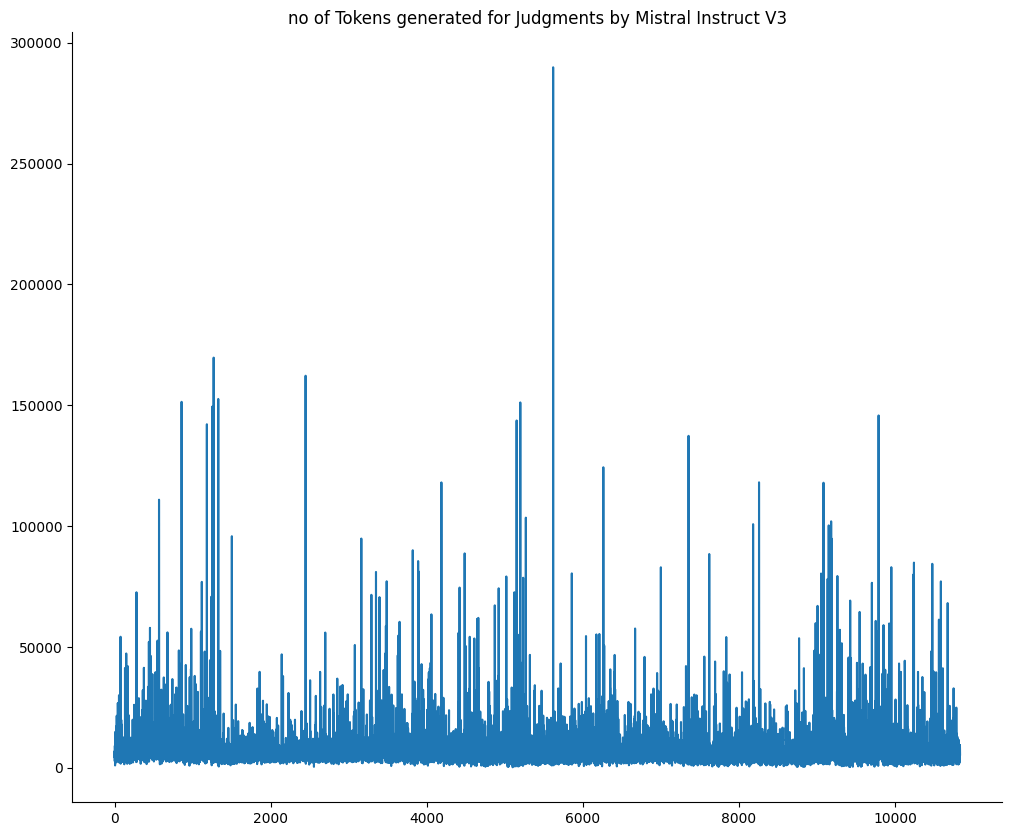

In [65]:
from matplotlib import pyplot as plt
df['JMTMIV3'].plot(kind='line', figsize=(12, 10), title='no of Tokens generated for Judgments by Mistral Instruct V3')
plt.gca().spines[['top', 'right']].set_visible(False)

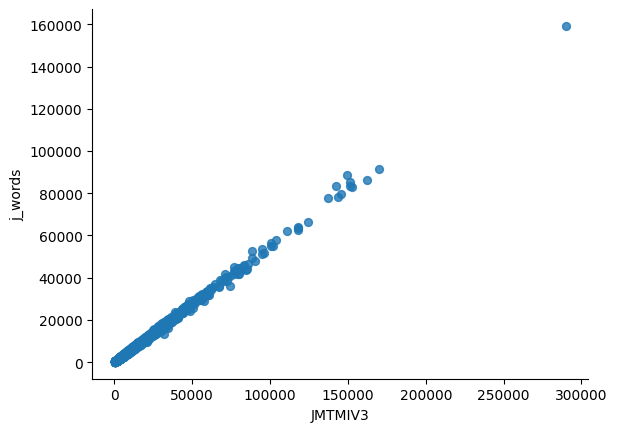

In [28]:
df.plot(kind='scatter', x='JMTMIV3', y='j_words', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

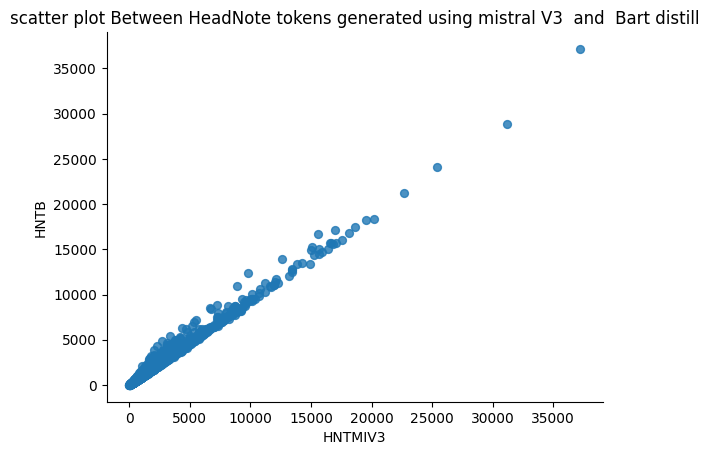

In [54]:
df.plot(kind='scatter', x='HNTMIV3', y='HNTB', s=32, alpha=.8)
plt.title("scatter plot Between HeadNote tokens generated using mistral V3  and  Bart distill")
plt.gca().spines[['top', 'right',]].set_visible(False)

# statistical analysis of the tokens

In [93]:
li=["h_words","j_words","HNTMIV3","JMTMIV3","JMTB","JMTALED","HNTB","HNTALED"]
df[li].describe(percentiles=[0.75,0.90, 0.95,0.97,0.98,0.99])

,h_words,j_words,HNTMIV3,JMTMIV3,JMTB,JMTALED,HNTB,HNTALED
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,803.540705,4364.780875,1509.336164,7998.280783,8418.273583,8418.273583,1431.438988,1431.438988
std,795.351235,5424.654538,1488.146157,9844.420573,10380.661592,10380.661592,1428.490771,1428.490771
min,8.000000,104.000000,11.000000,243.000000,246.000000,246.000000,9.000000,9.000000
50%,615.500000,3071.500000,1149.500000,5643.500000,5914.000000,5914.000000,1084.000000,1084.000000
75%,926.750000,4876.000000,1738.000000,8948.000000,9477.750000,9477.750000,1646.000000,1646.000000
90%,1436.000000,7857.700000,2695.700000,14336.700000,15391.400000,15391.400000,2585.700000,2585.700000
95%,1931.000000,11316.350000,3641.000000,20714.200000,21891.400000,21891.400000,3510.750000,3510.750000
97%,2416.030000,14529.160000,4522.070000,26309.570000,27825.640000,27825.640000,4347.060000,4347.060000
98%,2862.100000,17374.860000,5340.360000,31948.480000,33693.340000,33693.340000,5116.060000,5116.060000
